## Final Project: The global warming "troble maker" Deep Dive
### By Qiuyu Huang, Harshita Goyal, and Zhen Qi

# Abstract
<p>There has been a broad scientific consensus that the Earth's average temperature has been increasing over the past century due to human activity, primarily the burning of fossil fuels and deforestation. This warming trend is leading to a range of negative impacts on the environment, including rising sea levels, more frequent and severe weather events, and the loss of biodiversity.
The effects of climate change can be felt in our daily lives, from the food we eat to the air we breathe. Addressing this issue will require a collective effort from individuals, governments, and businesses around the world.Given the far-reaching consequences of climate change on our daily lives, it is crucial to take collective action to mitigate its effects and ensure a sustainable future for coming generations</p>



<p>As a team of data scientists, we aim to use data science techniques to analyze the key influencing factors of global warming. Our goal is to gain insights into the underlying causes of climate change and develop strategies to tackle the issue at its root. </p>

## Data Source

To achieve this, we plan to use the climate_change.csv dataset found at [dataset](https://www.kaggle.com/econdata/climate-change).

The file climate_change.csv contains climate data from May 1983 to December 2008. The
available variables include:
Year, Month, Temp, CO2, N2O, CH4, CFC.11, CFC.12 and TSI.





- **Year:** the observation year.

- **Month:** the observation month.

- **Temp:** the difference in degrees Celsius between the average global temperature in that period and a reference value. This data comes from the Climatic Research Unit at the University of East Anglia.

- **CO2, N2O, CH4, CFC.11, CFC.12:**: atmospheric concentrations of carbon dioxide (CO2), nitrous oxide (N2O), methane (CH4), trichlorofluoromethane (CCl3F; commonly referred to as CFC-11) and dichlorodifluoromethane (CCl2F2; commonly referred to as CFC-12), respectively. This data comes from the ESRL/NOAA Global Monitoring Division. CO2, N2O and CH4 are expressed in ppmv (parts per million by volume -- i.e., 397 ppmv of CO2 means that CO2 constitutes 397 millionths of the total volume of the atmosphere). CFC.11 and CFC.12 are expressed in ppbv (parts per billion by volume).
- **Aersols:** Aerosols: the mean stratospheric aerosol optical depth at 550 nm. This variable is linked to volcanoes, as volcanic eruptions result in new particles being added to the atmosphere, which affect how much of the sun's energy is reflected back into space. This data is from the Godard Institute for Space Studies at NASA.
- **TSI:**: the total solar irradiance (TSI) in W/m2 (the rate at which the sun's energy is deposited per unit area). Due to sunspots and other solar phenomena, the amount of energy that is given off by the sun varies substantially with time. This data is from the SOLARIS-HEPPA project website.
- **MEI:**: multivariate El Nino Southern Oscillation index (MEI), a measure of the strength of the El Nino/La Nina-Southern Oscillation (a weather effect in the Pacific Ocean that affects global temperatures). This data comes from the ESRL/NOAA Physical Sciences Division.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
from sklearn.preprocessing import scale
import statsmodels.api as sm
from sklearn.mixture import GaussianMixture

import matplotlib
from matplotlib import pyplot
from sklearn.metrics import r2_score
import mpl_toolkits.mplot3d as p3d

%matplotlib inline
SEED = 666

# Data Display

In [3]:
df = pd.read_csv('data/climate_change.csv')
df.head(10)

,Year,Month,MEI,CO2,CH4,N2O,CCl3F,CCl2F2,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
5,1983,10,0.002,340.30,1663.79,303.970,195.171,359.174,1366.0589,0.0569,0.093
6,1983,11,-0.176,341.53,1658.23,304.032,195.921,360.758,1366.1072,0.0524,0.232
7,1983,12,-0.176,343.07,1654.31,304.082,196.609,362.174,1366.0607,0.0486,0.078
8,1984,1,-0.339,344.05,1658.98,304.130,197.219,363.359,1365.4261,0.0451,0.089
9,1984,2,-0.565,344.77,1656.48,304.194,197.759,364.296,1365.6618,0.0416,0.013


In [4]:
# examine the dataset

print(df.describe())

              Year       Month         MEI         CO2          CH4  \
count   308.000000  308.000000  308.000000  308.000000   308.000000   
mean   1995.662338    6.551948    0.275555  363.226753  1749.824513   
std       7.423197    3.447214    0.937918   12.647125    46.051678   
min    1983.000000    1.000000   -1.635000  340.170000  1629.890000   
25%    1989.000000    4.000000   -0.398750  353.020000  1722.182500   
50%    1996.000000    7.000000    0.237500  361.735000  1764.040000   
75%    2002.000000   10.000000    0.830500  373.455000  1786.885000   
max    2008.000000   12.000000    3.001000  388.500000  1814.180000   

              N2O       CCl3F      CCl2F2          TSI    Aerosols        Temp  
count  308.000000  308.000000  308.000000   308.000000  308.000000  308.000000  
mean   312.391834  251.973068  497.524782  1366.070759    0.016657    0.256776  
std      5.225131   20.231783   57.826899     0.399610    0.029050    0.179090  
min    303.677000  191.324000  350.1

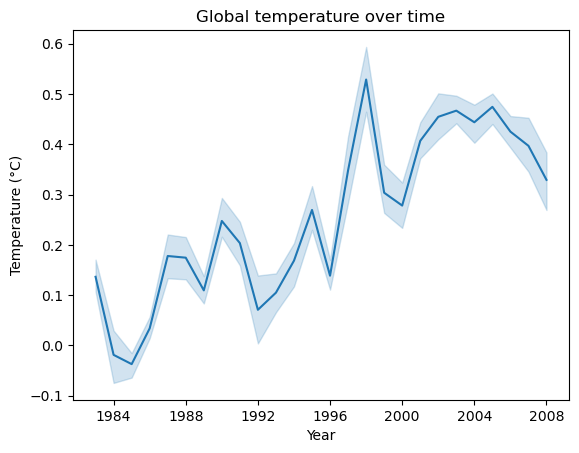

In [5]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Create a line plot of the average temperature over time
sns.lineplot(x='Year', y='Temp', data=df)

# Add labels and a title to the plot
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Global temperature over time')

# Show the plot
plt.show()

#### From the above chart, we know that the temperature increases overtme. Now, let's clean the data and see what affects it the most

## Methodology
### Data Cleaning

In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CCl3F       0
CCl2F2      0
TSI         0
Aerosols    0
Temp        0
dtype: int64


In [7]:
# Check for duplicates
print(df.duplicated().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)



0


In [8]:
# Check the data types of each column
print(df.dtypes)

Year        datetime64[ns]
Month                int64
MEI                float64
CO2                float64
CH4                float64
N2O                float64
CCl3F              float64
CCl2F2             float64
TSI                float64
Aerosols           float64
Temp               float64
dtype: object


In [9]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

             Month       MEI       CO2       CH4       N2O     CCl3F  \
Month     1.000000 -0.016345 -0.096287  0.017558  0.012395 -0.014914   
MEI      -0.016345  1.000000 -0.152911 -0.105555 -0.162375  0.088171   
CO2      -0.096287 -0.152911  1.000000  0.872253  0.981135  0.401284   
CH4       0.017558 -0.105555  0.872253  1.000000  0.894409  0.713504   
N2O       0.012395 -0.162375  0.981135  0.894409  1.000000  0.412155   
CCl3F    -0.014914  0.088171  0.401284  0.713504  0.412155  1.000000   
CCl2F2   -0.001084 -0.039836  0.823210  0.958237  0.839295  0.831381   
TSI      -0.032754 -0.076826  0.017867  0.146335  0.039892  0.284629   
Aerosols  0.014845  0.352351 -0.369265 -0.290381 -0.353499 -0.032302   
Temp     -0.098016  0.135292  0.748505  0.699697  0.743242  0.380111   

            CCl2F2       TSI  Aerosols      Temp  
Month    -0.001084 -0.032754  0.014845 -0.098016  
MEI      -0.039836 -0.076826  0.352351  0.135292  
CO2       0.823210  0.017867 -0.369265  0.748505  
CH4

/var/folders/17/mbjrz26d3w76tqn7n679s12c0000gn/T/ipykernel_3084/2262856142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


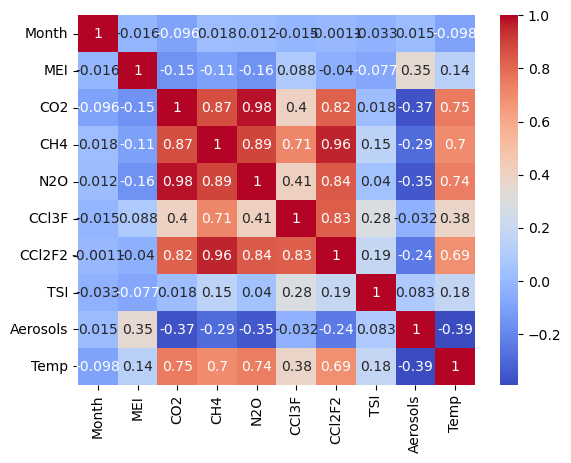

<Figure size 2000x1600 with 0 Axes>

Temp        1.000000
CO2         0.748505
N2O         0.743242
CH4         0.699697
CCl2F2      0.688944
CCl3F       0.380111
TSI         0.182186
MEI         0.135292
Month      -0.098016
Aerosols   -0.392069
Name: Temp, dtype: float64


In [10]:
# Plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

plt.figure(figsize=(20, 16))

# Show the plot
plt.show()

# Check the correlation between variables and temperature
corr_with_temp = corr_matrix['Temp'].sort_values(ascending=False)
print(corr_with_temp)

#### Based on the results, we can see that CO2, N20. CH4 have the highest correlation with temperature. This suggests that these variables may have a strong influence on global temperature and should be further investigated in climate change research.

In [11]:
df = df.drop(['Year', 'Month'], axis=1)

df.head(10)

,MEI,CO2,CH4,N2O,CCl3F,CCl2F2,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149
5,0.002,340.30,1663.79,303.970,195.171,359.174,1366.0589,0.0569,0.093
6,-0.176,341.53,1658.23,304.032,195.921,360.758,1366.1072,0.0524,0.232
7,-0.176,343.07,1654.31,304.082,196.609,362.174,1366.0607,0.0486,0.078
8,-0.339,344.05,1658.98,304.130,197.219,363.359,1365.4261,0.0451,0.089
9,-0.565,344.77,1656.48,304.194,197.759,364.296,1365.6618,0.0416,0.013


<br>
<center>
<img src="images/dc.jfif" width=500 />
</center>
<br>

<p>So, let's analyze this relationship using some kinds of data science methology.</p>



<h1>Data Science<h1>
    <h2>Random Forest</h2>

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [13]:
# Create X and y variables
X = df.drop(['Temp'], axis=1)
y = df['Temp']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Get the feature importances
importances = rf_model.feature_importances_



In [14]:
# Get R^2 score (indicator of accuracy 1 is perfect, 0 is horrible)
r_score_train = rf_model.score(X_train, y_train)
r_score_test = rf_model.score(X_test, y_test)
print('The R^2 score of Random Forest Regression for training set is', r_score_train)
print('\nThe R^2 score of Random Forest Regression for testing set is', r_score_test)

The R^2 score of Random Forest Regression for training set is 0.9760274958634427

The R^2 score of Random Forest Regression for testing set is 0.8232752071673292


<p>The high R^2 indicate that this is a good enough model, let us see the prediction.</p>

In [15]:
y_pred = rf_model.predict(X_test)

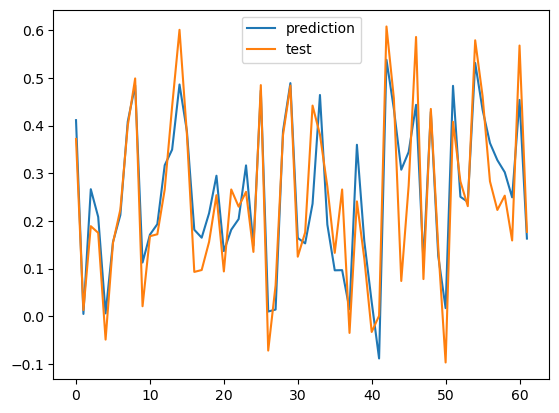

In [16]:
y_test2 = y_test.values
plt.plot(y_pred,label = 'prediction') #blue
plt.plot(y_test2,label = 'test')#orange
plt.legend()

<p>The prediction is not bad at all.</p>

In [17]:
#Random forest also gives us the most important features in predicting the Temp.
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('CCl2F2', 0.5665679199667374),
 ('N2O', 0.09870964509439471),
 ('Aerosols', 0.09331351668948432),
 ('MEI', 0.09115656095732984),
 ('CCl3F', 0.0639018076083563),
 ('CO2', 0.03312829613958563),
 ('TSI', 0.03235391405387272),
 ('CH4', 0.02086833949023907)]

<p> Now, we can see CC12F2 is the most important affecting factor. </p>

## DecisionTree + Adaboost

Apart from Random Forest, we can also try adaboost regression. Adaboost is one of the most famous boosting algorithm due to its simplicity and high accuracy.

In [18]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [19]:

df = pd.read_csv('data/climate_change.csv')
# Drop rows with missing values
df.dropna(inplace=True)

# Create X and y variables
X = df.drop(['Year', 'Temp'], axis=1)
y = df['Temp']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
base_model = DecisionTreeRegressor(max_depth=3)

# Create an AdaBoost model
model = AdaBoostRegressor(base_estimator=base_model, n_estimators=100, random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

print('The R^2 score of Adaboost Regression for training set is', model.score(X_train, y_train))
print('The R^2 score of Adaboost Regression for testing set is', model.score(X_test, y_test))


The R^2 score of Adaboost Regression for training set is 0.8726641447587614
The R^2 score of Adaboost Regression for testing set is 0.7748573665020773


In [20]:

# Get the feature importances
importances = model.feature_importances_

# Create a dataframe of feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances}).sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)


    feature  importance
6    CCl2F2    0.407782
4       N2O    0.141098
1       MEI    0.100622
8  Aerosols    0.100577
7       TSI    0.073802
2       CO2    0.056609
5     CCl3F    0.050395
3       CH4    0.040930
0     Month    0.028187


<p> Same as what the random forest indicated, Now, we can see CCl2F2 is the most important affecting factor. CFC-12 (also known as dichlorodifluoromethane or Freon-12) is a chlorofluorocarbon (CFC) compound that was widely used as a refrigerant and propellant in aerosol cans, among other industrial and commercial applications. CFC-12 is a colorless, non-toxic, and non-flammable gas at room temperature and was commonly used in air conditioning and refrigeration systems until its production was banned by the Montreal Protocol due to its harmful impact on the ozone layer. It is one of several CFCs that were found to contribute to the depletion of the ozone layer in the Earth's atmosphere.</p>

## Linear Regression

<p>I want to use linear regression and formula to see what's the most important factors</p>

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object and fit_transform the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a linear regression model using the scaled features
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_scaled, y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print('Intercept:', intercept)
for i in range(len(X.columns)):
    print(X.columns[i], ':', coefficients[i])

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Intercept: 0.2566109961148286
Month : -0.00940989036755846
MEI : 0.05686161722898772
CO2 : 0.03472134474500544
CH4 : 0.005481458532095332
N2O : -0.05671290228436325
CCl3F : -0.14516037714990543
CCl2F2 : 0.24628297773298036
TSI : 0.031869245945844026
Aerosols : -0.0450746812946667
Mean squared error: 0.009420760454768924


In [22]:
# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
feature_names = X.columns

# Construct the formula
formula = 'y = {:.2f} + '.format(intercept)
for i in range(len(X.columns)):
    formula += '{:.2f} * {} + '.format(coefficients[i], X.columns[i])

# Print the formula
print('Linear regression formula:')
print(formula[:-3])  # Remove the last ' + ' characters

Linear regression formula:
y = 0.26 + -0.01 * Month + 0.06 * MEI + 0.03 * CO2 + 0.01 * CH4 + -0.06 * N2O + -0.15 * CCl3F + 0.25 * CCl2F2 + 0.03 * TSI + -0.05 * Aerosols


In [23]:
feature_names = X.columns
# Sort the coefficients in descending order
idx = np.argsort(abs(coefficients))[::-1]
coefficients_sorted = coefficients[idx]
feature_names_sorted = feature_names[idx]

# Print the top 5 features
print('Top 5 features:')
for i in range(5):
    print('{}: {:.2f}'.format(feature_names_sorted[i], coefficients_sorted[i]))

Top 5 features:
CCl2F2: 0.25
CCl3F: -0.15
MEI: 0.06
N2O: -0.06
Aerosols: -0.05


<p>From the linear regression, we can also see that CCl2F2 plays the most factors.</p>

<h1> Other data mining technical </h1>

<h1>Artificial Neural Network</h1>

2023-04-16 00:30:30.827331: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100


2023-04-16 00:30:32.751675: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


8/8 [==============================] - 0s 909us/step - loss: 0.1150
Epoch 2/100
8/8 [==============================] - 0s 782us/step - loss: 0.0530
Epoch 3/100
8/8 [==============================] - 0s 944us/step - loss: 0.0317
Epoch 4/100
8/8 [==============================] - 0s 930us/step - loss: 0.0236
Epoch 5/100
8/8 [==============================] - 0s 809us/step - loss: 0.0195
Epoch 6/100
8/8 [==============================] - 0s 920us/step - loss: 0.0162
Epoch 7/100
8/8 [==============================] - 0s 799us/step - loss: 0.0145
Epoch 8/100
8/8 [==============================] - 0s 1ms/step - loss: 0.0134
Epoch 9/100
8/8 [==============================] - 0s 835us/step - loss: 0.0123
Epoch 10/100
8/8 [==============================] - 0s 967us/step - loss: 0.0115
Epoch 11/100
8/8 [==============================] - 0s 833us/step - loss: 0.0108
Epoch 12/100
8/8 [==============================] - 0s 985us/step - loss: 0.0103
Epoch 13/100
8/8 [==============================] -

2/2 [==============================] - 0s 1ms/step


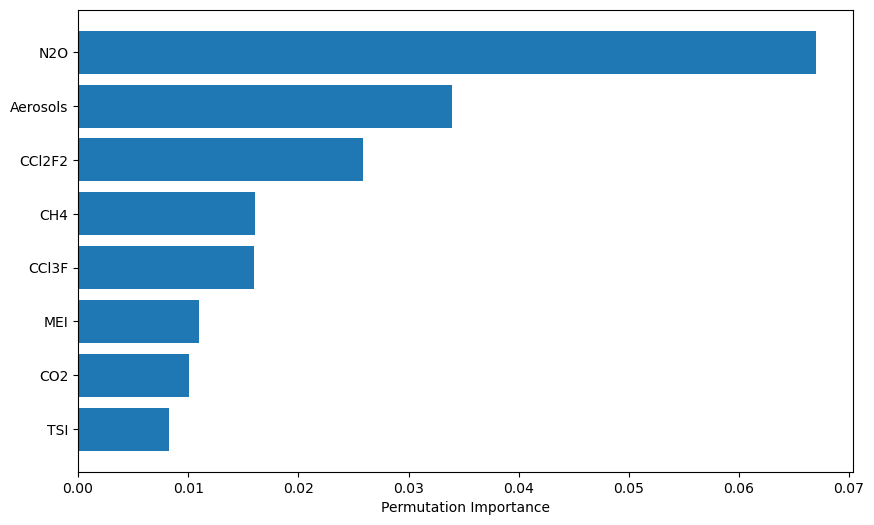

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from sklearn.inspection import permutation_importance
from sklearn.base import BaseEstimator, RegressorMixin

# Load the data
# Load the dataset
data = pd.read_csv('data/climate_change.csv')

# Drop unnecessary columns (if any)
# data = data.drop(columns=["column_name"])

# Check for missing values and handle them (either by dropping or filling)
data = data.dropna()

# Separate features and target variable
# Split the data into input and output variables
X = df.drop(['Year','Month', 'Temp'], axis=1)
y = data['Temp']


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


def create_ann_model(input_dim):
    model = Sequential()
    model.add(Dense(32, activation="relu", input_dim=input_dim))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model

# Create the ANN model
input_dim = X_train_scaled.shape[1]
ann_model = create_ann_model(input_dim)

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1)


# Make predictions
y_pred = ann_model.predict(X_test_scaled)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)




class KerasRegressorWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y):
        self.model.fit(X, y, epochs=100, batch_size=32, verbose=1)
        return self
    
    def predict(self, X):
        return self.model.predict(X)
    
    def score(self, X, y):
        y_pred = self.model.predict(X)
        return -mean_squared_error(y, y_pred)
    
    
# Wrap the Keras model
ann_model_wrapped = KerasRegressorWrapper(ann_model)


# Get permutation importance
result = permutation_importance(ann_model_wrapped, X_test_scaled, y_test, n_repeats=10, random_state=0)

# Sort and display the feature importances
importances_sorted_idx = result.importances_mean.argsort()

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(X_test_scaled.shape[1]), result.importances_mean[importances_sorted_idx])
plt.yticks(range(X_test_scaled.shape[1]), X.columns[importances_sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()




# Convolutional Neural Networks （CNN）

## Data preprocessing
In this section, the data is loaded from the CSV file and split into training and test sets. The MinMaxScaler is used to scale the features to a range between 0 and 1.

In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('data/climate_change.csv')
X = df.iloc[:, 2:9].values
y = df.iloc[:, -1].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model creation and training
In this section, the neural network model is defined and compiled with the mse loss function and the adam optimizer. The model is trained for 100 epochs using the training data, and the validation loss is monitored during training.

In [26]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(7, 1)))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['mse'])

history = model.fit(X_train.reshape(-1, 7, 1), y_train, epochs=100, validation_split=0.2)


Epoch 1/100
7/7 [==============================] - 0s 19ms/step - loss: 0.1064 - mse: 0.1064 - val_loss: 0.0341 - val_mse: 0.0341
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0206 - mse: 0.0206 - val_loss: 0.0132 - val_mse: 0.0132
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0182 - mse: 0.0182 - val_loss: 0.0105 - val_mse: 0.0105
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0173 - mse: 0.0173 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0154 - mse: 0.0154 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0087 - val_mse: 0.0087
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0136 - mse: 0.0136 - va

7/7 [==============================] - 0s 5ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 65/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0083 - mse: 0.0083 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 66/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 67/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0069 - val_mse: 0.0069
Epoch 68/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0091 - mse: 0.0091 - val_loss: 0.0067 - val_mse: 0.0067
Epoch 69/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 70/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0088 - mse: 0.0088 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 71/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0084 - mse: 0.0084 - val_loss

## Model evaluation
In this section, the trained model is evaluated on the test data using the evaluate() method. The test loss and MSE are printed to the console.

In [27]:
loss, mse = model.evaluate(X_test.reshape(-1, 7, 1), y_test)

print(f"Test loss: {loss:.4f}")
print(f"Test MSE: {mse:.4f}")

2/2 [==============================] - 0s 2ms/step - loss: 0.0105 - mse: 0.0105
Test loss: 0.0105
Test MSE: 0.0105


## Results visualization
In this section, the model's performance is visualized using matplotlib. Two plots are generated: one shows the training and validation MSE over the course of training, and the other shows the actual and predicted temperatures on the test set.

2/2 [==============================] - 0s 1ms/step


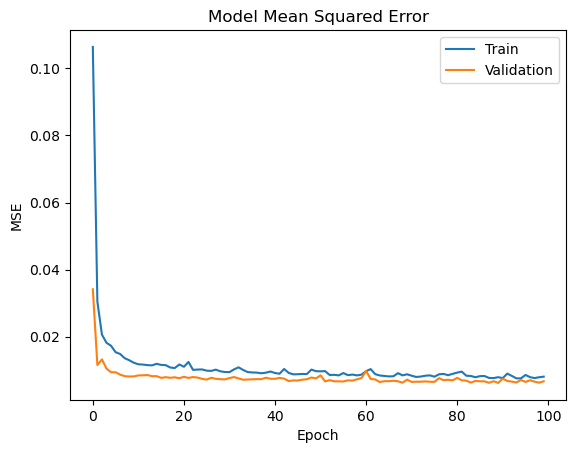

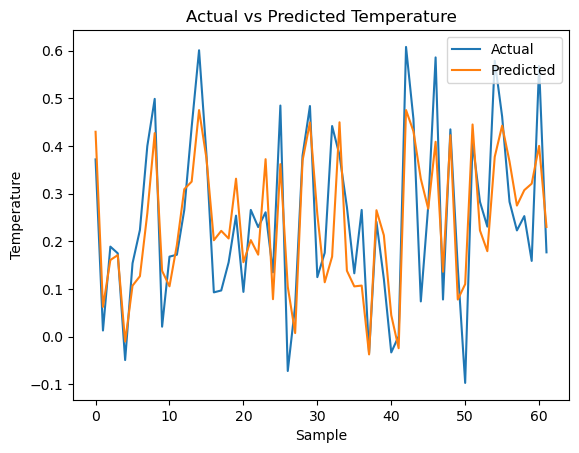

In [28]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test.reshape(-1, 7, 1))

plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('Model Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(y_test)
plt.plot(y_pred)
plt.title('Actual vs Predicted Temperature')
plt.ylabel('Temperature')
plt.xlabel('Sample')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()


This code implements a Convolutional Neural Network (CNN) to predict temperature changes based on greenhouse gas levels and other factors. The data is preprocessed using MinMaxScaler and split into training and testing sets. The CNN model is constructed with two Conv1D layers, a MaxPooling1D layer, and two Dense layers. The model is trained on the training set and evaluated on the testing set, with the loss and MSE displayed in a plot. The model is used to predict temperature changes on the testing set, with the predicted values plotted against the actual values. The test loss and test MSE are then printed. 

# Discussion

# Future work

# Conclusion